# **Project - Classification and Hypothesis Testing: Hotel Booking Cancellation Prediction**

## **Marks: 40**

---------------
## **Problem Statement**

### **Context**

**A significant number of hotel bookings are called off due to cancellations or no-shows.** Typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost. This may be beneficial to hotel guests, but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

This pattern of cancellations of bookings impacts a hotel on various fronts:
1. **Loss of resources (revenue)** when the hotel cannot resell the room.
2. **Additional costs of distribution channels** by increasing commissions or paying for publicity to help sell these rooms.
3. **Lowering prices last minute**, so the hotel can resell a room, resulting in reducing the profit margin.
4. **Human resources to make arrangements** for the guests.

### **Objective**

This increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal - they are facing problems with this high number of booking cancellations and have reached out to your firm for data-driven solutions. You, as a Data Scientist, have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


### **Data Description**

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below:


**Data Dictionary**

* **Booking_ID:** Unique identifier of each booking
* **no_of_adults:** Number of adults
* **no_of_children:** Number of children
* **no_of_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights:** Number of weekday nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan:** Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* **required_car_parking_space:** Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved:** Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* **lead_time:** Number of days between the date of booking and the arrival date
* **arrival_year:** Year of arrival date
* **arrival_month:** Month of arrival date
* **arrival_date:** Date of the month
* **market_segment_type:** Market segment designation.
* **repeated_guest:** Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations:** Number of previous bookings that were canceled by the customer prior to the current booking
* **no_of_previous_bookings_not_canceled:** Number of previous bookings not canceled by the customer prior to the current booking
* **avg_price_per_room:** Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests:** Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status:** Flag indicating if the booking was canceled or not.

## **Importing the libraries required**

In [430]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,ConfusionMatrixDisplay,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [431]:
hotel = pd.read_csv("INNHotelsGroup.csv")

In [432]:
# Copying data to another variable to avoid any changes to original data
data = hotel.copy()

## **Overview of the dataset**

### **View the first and last 5 rows of the dataset**

Let's **view the first few rows and last few rows** of the dataset in order to understand its structure a little better.

We will use the head() and tail() methods from Pandas to do this.

In [433]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [434]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


### **Understand the shape of the dataset**

In [435]:
data.shape

(36275, 19)

* The dataset has 36275 rows and 19 columns. 

### **Check the data types of the columns for the dataset**

In [436]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of object type while rest columns are numeric in nature.

* There are no null values in the dataset.

### **Dropping duplicate values**

In [437]:
# checking for duplicate values
data.duplicated().sum()

0

- There are **no duplicate values** in the data.

### **Dropping the unique values column**

**Let's drop the Booking_ID column first before we proceed forward**, as a column with unique values will have almost no predictive power for the Machine Learning problem at hand.

In [438]:
data = data.drop(["Booking_ID"], axis=1)

In [439]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### **Question 1: Check the summary statistics of the dataset and write your observations (2 Marks)**



**Let's check the statistical summary of the data.**

In [440]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


- Regarding the average number of adults per booking is 1.84, with a standard deviation of 0.52.
The minimum number of adults is 0, and the maximum is 4. Since the 25% and 75% both are valued at 2, over 50% of the booking are for 2 adults and over 75% are for 2 and higher.  

- Regarding the number of children per booking, the average is 0.11, with a standard deviation of 0.40.
Most bookings (75%) have no children, as the 75th percentile is 0.
The maximum number of children in a booking is 10.
Number of weekend nights and week nights:

- On average, bookings include 0.81 weekend nights and 2.20 week nights.
The maximum number of weekend nights is 7, and for week nights, it's 17. From the data it is reasonable to assume these are outliers.

- On average, 0.03 car parking spaces are required per booking.
Most bookings do not require parking, as the median and the 75th percentile are both 0.
A maximum of 1 parking space is required in some bookings.

- The average lead time before arrival is 85.23days.
The minimum lead time is 0 days (same-day booking), while the maximum is 443 days. The distribution appears to be markedly skewed to the right.

- The data mainly covers bookings from the years 2017 and 2018.
The average arrival month is 7.42 (around July), with a standard deviation of 3.07.
The average arrival date is the 15.6th day of the month. The std would imply a more uniform distribution then normal distribution as regards month and day of booking. 

- Only 2.56% of bookings are from repeated guests.
On average, there are 0.02 previous cancellations per booking and 0.15 previous bookings not canceled.

- The average price per room is $103.42, with a standard deviation of $35.09.
The minimum price is $0 (possibly free rooms or data error), while the maximum is $540.

- On average, there are 0.62 special requests per booking.
Most bookings (50%) have no special requests, as indicated by the median value.
The maximum number of special requests in a booking is 5.

- The degree of non null values is consistent across the data set.

## **Exploratory Data Analysis**

### **Question 2: Univariate Analysis**

Let's explore these variables in some more depth by observing their distributions.

We will first define a **hist_box() function** that provides both a boxplot and a histogram in the same visual, with which we can perform univariate analysis on the columns of this dataset.

In [441]:
# Defining the hist_box() function
def hist_box(data,col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
  # Adding a graph in each part
  sns.boxplot(data[col], ax=ax_box, showmeans=True)
  sns.distplot(data[col], ax=ax_hist)
  plt.show()

#### **Question 2.1:  Plot the histogram and box plot for the variable `Lead Time` using the hist_box function provided and write your insights. (1 Mark)**

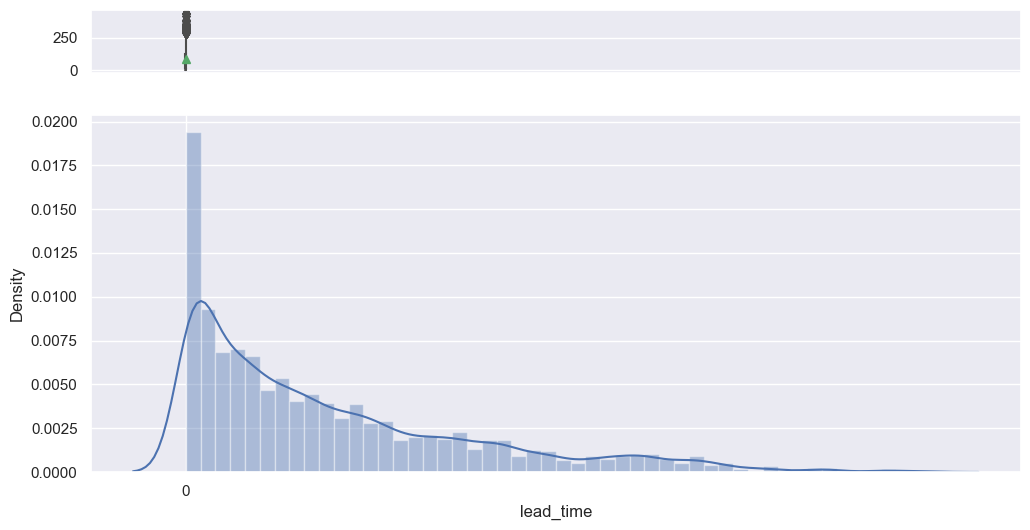

In [442]:

hist_box(data,'lead_time')    

- The lead-time distribution shows a zero-day lead time as the most common, with each subsequent day having progressively lower counts. 
- The graph is heavily skewed to the right with no values to the left of the mode of the distribution, and it has a long tail trailing to the right. This implies that the distribution may be exponential in nature. 
- Such a distribution suggests that most people tend to book their stays closer to the arrival date, while a smaller number of people book significantly earlier.
- This pattern could be due to various factors, such as booking habits, uncertainty about future plans, or waiting for discounts and offers closer to the arrival date.

#### **Question 2.2:  Plot the histogram and box plot for the variable `Average Price per Room` using the hist_box function provided and write your insights. (1 Mark)**

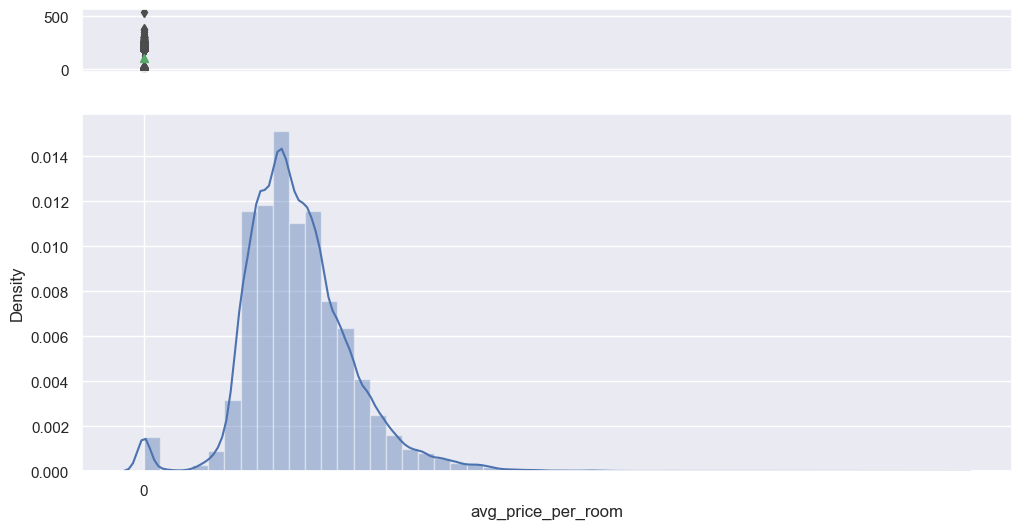

In [443]:

hist_box(data,"avg_price_per_room")

- The distribution of the average price per room appears to be approximately normal, but with a mild right skew. 
- There is a noticeable outlier group of data points with a value of zero, which seem unrelated to the natural distribution.
- These outliers could be attributed to errors in the data collection process or other special circumstances, such as promotional deals, complimentary or other unique booking situations

**Interestingly some rooms have a price equal to 0. Let's check them.**

In [444]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- There are quite a few hotel rooms which have a price equal to 0.
- In the market segment column, it looks like many values are complementary.

In [445]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

* It makes sense that most values with room prices equal to 0 are the rooms given as complimentary service from the hotel.
* The rooms booked online must be a part of some promotional campaign done by the hotel.

In [446]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [447]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

#### **Let's understand the distribution of the categorical variables**

**Number of Children**

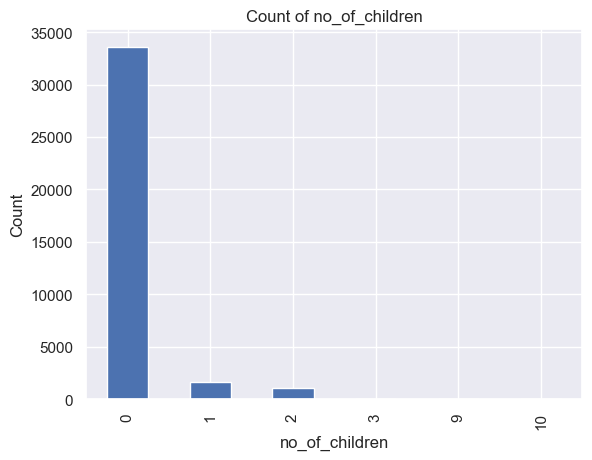

In [448]:

month_counts = data['no_of_children'].value_counts().sort_index()

month_counts.plot(kind='bar')
plt.xlabel('no_of_children')
plt.ylabel('Count')
plt.title('Count of no_of_children')
plt.show()

In [449]:
data['no_of_children'].value_counts(normalize=True)

0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: no_of_children, dtype: float64

* Customers were not travelling with children in 93% of cases.
* There are some values in the data where the number of children is 9 or 10, which is highly unlikely. 
* We will replace these values with the maximum value of 3 children.

In [450]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

**Arrival Month**

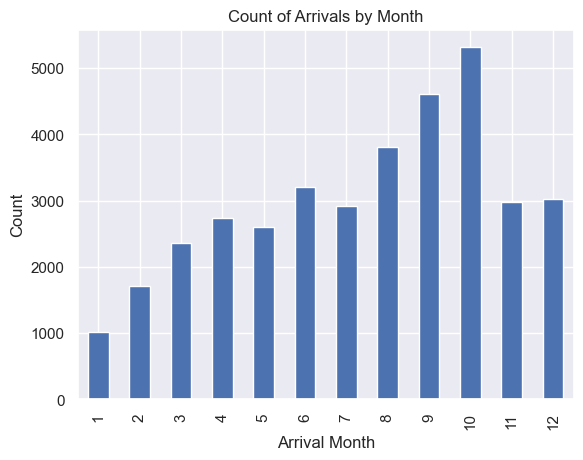

In [451]:

month_counts = data['arrival_month'].value_counts().sort_index()

month_counts.plot(kind='bar')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.title('Count of Arrivals by Month')
plt.show()

In [452]:
data['arrival_month'].value_counts(normalize=True)

10    0.146575
9     0.127112
8     0.105114
6     0.088298
12    0.083280
11    0.082150
7     0.080496
4     0.075424
5     0.071620
3     0.065003
2     0.046975
1     0.027953
Name: arrival_month, dtype: float64

* October is the busiest month for hotel arrivals followed by September and August. **Over 35% of all bookings**, as we see in the above table, were for one of these three months.
* Around 14.7% of the bookings were made for an October arrival.

**Booking Status**

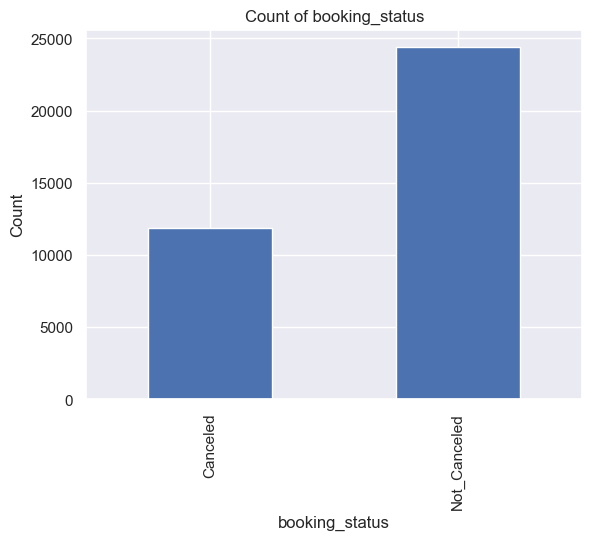

In [453]:
# sns.countplot(data["booking_status"])
# plt.show()

month_counts = data['booking_status'].value_counts().sort_index()

month_counts.plot(kind='bar')
plt.xlabel('booking_status')
plt.ylabel('Count')
plt.title('Count of booking_status')
plt.show()

In [454]:
data['booking_status'].value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

* 32.8% of the bookings were canceled by the customers.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [455]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

# print number 

### **Question 3: Bivariate Analysis**

#### **Question 3.1: Find and visualize the correlation matrix using a heatmap and write your observations from the plot. (2 Marks)**



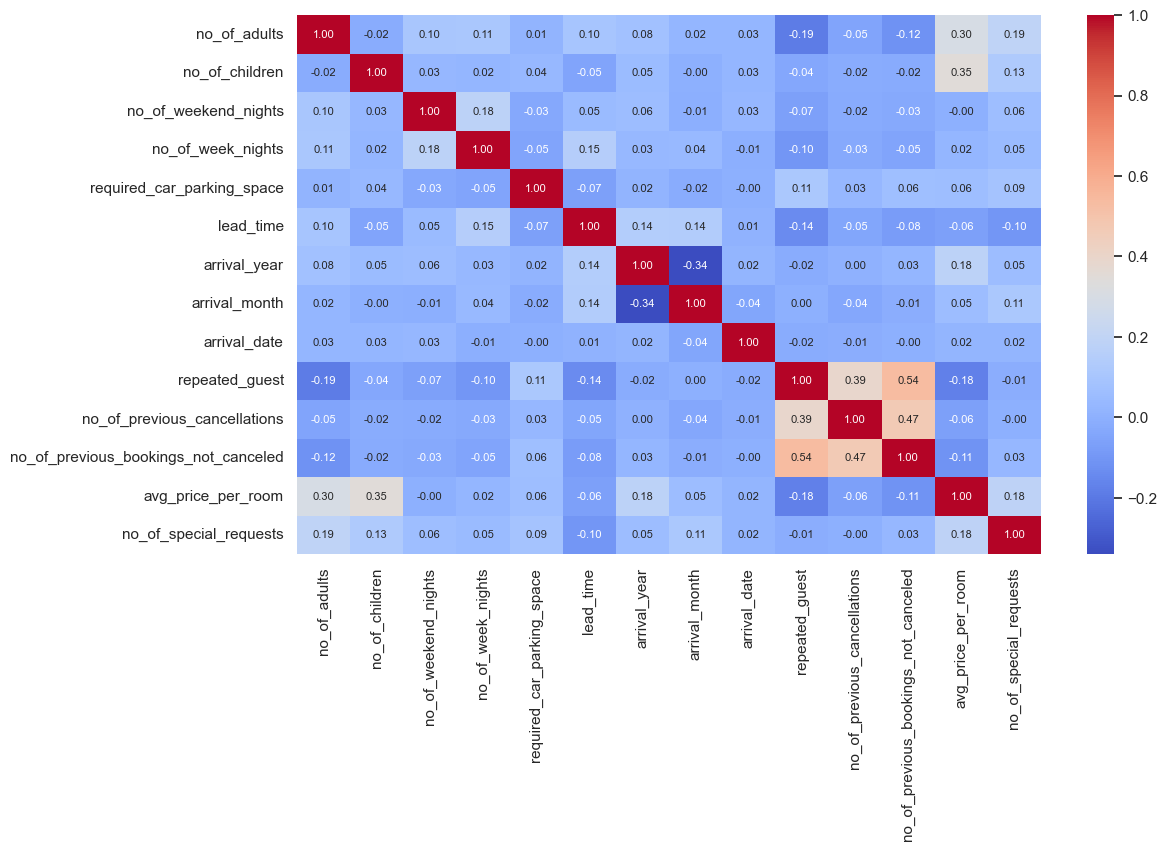

In [456]:

# Get the list of numeric columns
cols_list = data.drop(["booking_status"], axis=1).select_dtypes(include=np.number).columns.tolist()

# Calculate the correlation matrix for the numeric columns
corr_matrix = data[cols_list].corr()

# Create the heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(corr_matrix, annot=True, fmt = '.2f', cmap='coolwarm', annot_kws={"size": 8})
plt.show()

- There are no significant correlations between the various columns of the dataset that would warrant the removal of any columns from the modeling process.
- The most significant correlations are related to repeated guests. Given that the repeated guest value is binary, this is not surprising. There is a 0.54 correlation between repeat guests and the number of previous bookings not canceled, and a 0.39 correlation between repeat guests and the number of previous bookings that were canceled. This is expected since guests who frequently visit a hotel are more likely to have both previous non-canceled bookings and canceled bookings than those who do not frequent the hotel.
- Of note, there is a slightly negative correlation between the year and the month (-0.34). Since there are only two years in the dataset, 2017 and 2018, this relationship is not meaningful.
- There is a 0.35 and 0.30 correlation between the average price per room and the number of children and adults, respectively. This is expected since more people requiring accommodations would likely be charged more as they require additional beds.


**Hotel rates are dynamic and change according to demand and customer demographics. Let's see how prices vary across different market segments**

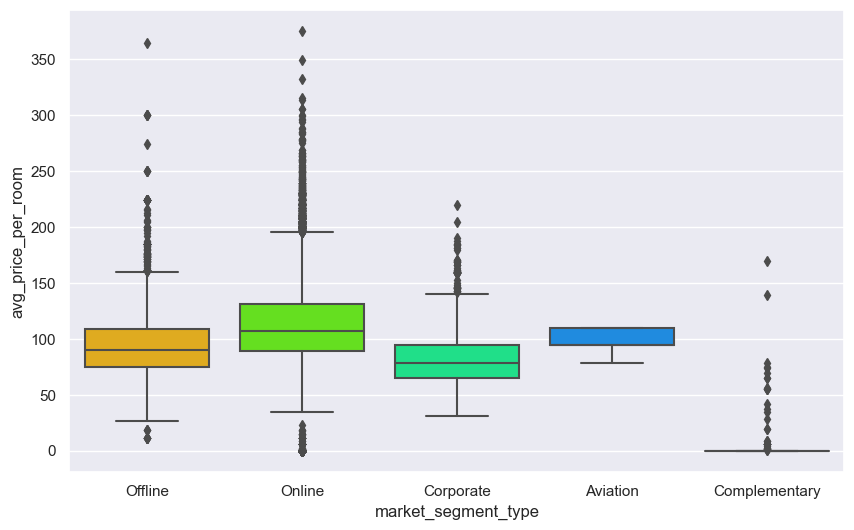

In [457]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room", palette="gist_rainbow"
)
plt.show()

* Rooms booked online have high variations in prices.
* The offline and corporate room prices are almost similar.
* Complementary market segment gets the rooms at very low prices, which makes sense.

We will define a **stacked barplot()** function to help analyse how the target variable varies across predictor categories.

In [458]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel('Percentage Cancellations %')

#### **Question 3.2: Plot the stacked barplot for the variable `Market Segment Type` against the target variable `Booking Status` using the stacked_barplot  function provided and write your insights. (1 Mark)**

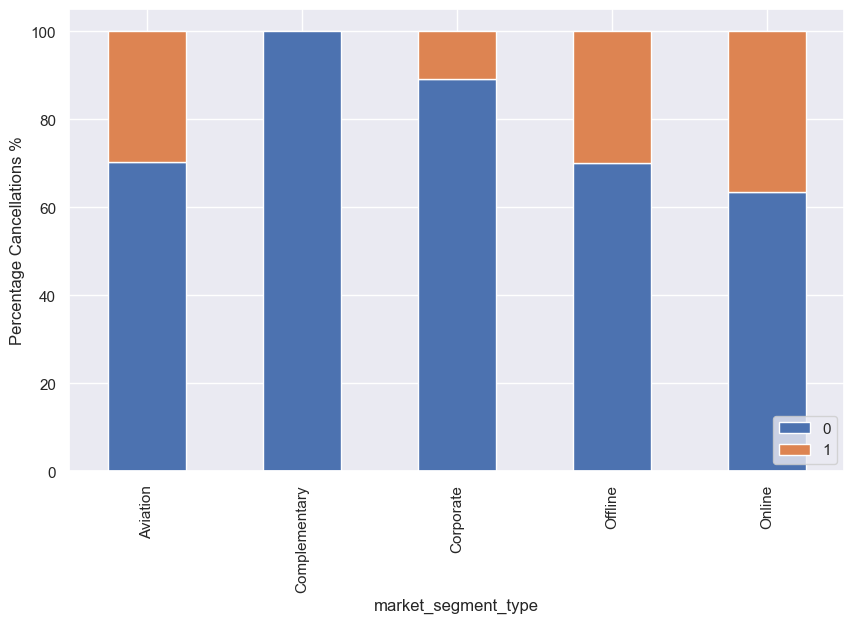

In [459]:

stacked_barplot(data,'market_segment_type','booking_status')

In [460]:

bookings_by_segment_status = data.groupby(['market_segment_type', 'booking_status'])['booking_status'].count().unstack()

total_by_segment = bookings_by_segment_status.sum(axis=1)

cancellation_rate_within_segment = (bookings_by_segment_status[1] / total_by_segment) * 100

print(cancellation_rate_within_segment)

# print the values of the booking status column where the market_segment_type is complementary
print(data[data["market_segment_type"] == "Complementary"]["booking_status"].unique())

market_segment_type
Aviation         29.600000
Complementary          NaN
Corporate        10.907288
Offline          29.948708
Online           36.508142
dtype: float64
[0]


- The cancellation rates within each market segment type reveal that online bookings have the highest cancellation rate at 36.51%, likely due to the ease of canceling reservations
- corporate bookings have the lowest rate at 10.91%, possibly because of more stable schedules.
- Offline bookings and aviation-related reservations also have relatively high cancellation rates, at 29.95% and 29.6%, respectively.
- Within the Complementary catogory of reservations, the cancellation rate is 0%. This is likely because these reservations are unable to be refunded or reused for other bookings in the future.


#### **Question 3.3: Plot the stacked barplot for the variable `Repeated Guest` against the target variable `Booking Status` using the stacked_barplot  function provided and write your insights. (1 Mark)**

Repeating guests are the guests who stay in the hotel often and are important to brand equity.

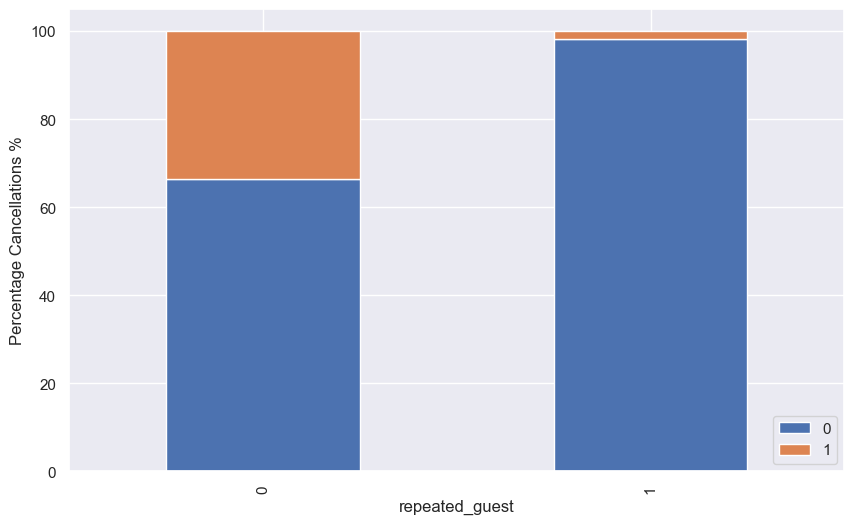

In [461]:
stacked_barplot(data,'repeated_guest','booking_status')

In [462]:
bookings_by_repeated_guest_status = data.groupby(['repeated_guest', 'booking_status'])['booking_status'].count().unstack()

total_by_segment = bookings_by_repeated_guest_status.sum(axis=1)

cancellation_rate_within_segment = (bookings_by_repeated_guest_status[1] / total_by_segment) * 100

print(cancellation_rate_within_segment)

repeated_guest
0    33.580422
1     1.720430
dtype: float64


- The cancellation rates for repeated_guest categories indicate that non-repeated guests (0) have a higher cancellation rate at 33.58% compared to repeated guests (1) with a cancellation rate of 1.72%.
- This could suggest that loyal guests or those who frequently visit the hotel are less likely to cancel their bookings, possibly due to familiarity with the hotel, stronger commitment to their reservations, or more stable travel plans.


**Let's analyze the customer who stayed for at least a day at the hotel.**

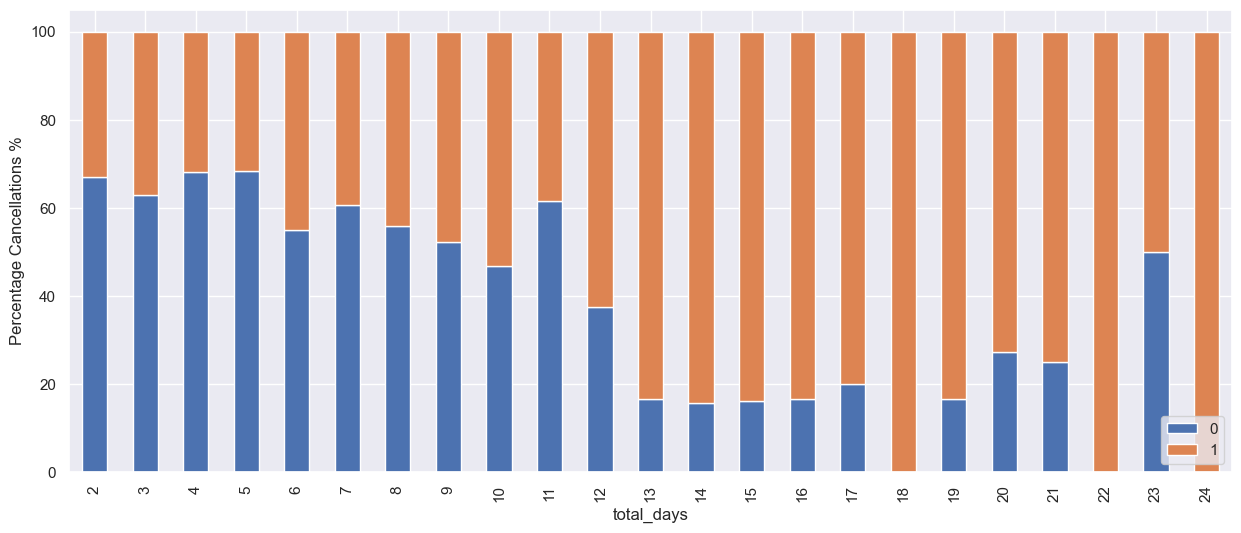

In [463]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data["total_days"] = (stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])

stacked_barplot(stay_data, "total_days", "booking_status",figsize=(15,6))

* The general trend is that the chances of cancellation increase as the number of days the customer planned to stay at the hotel increases.

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

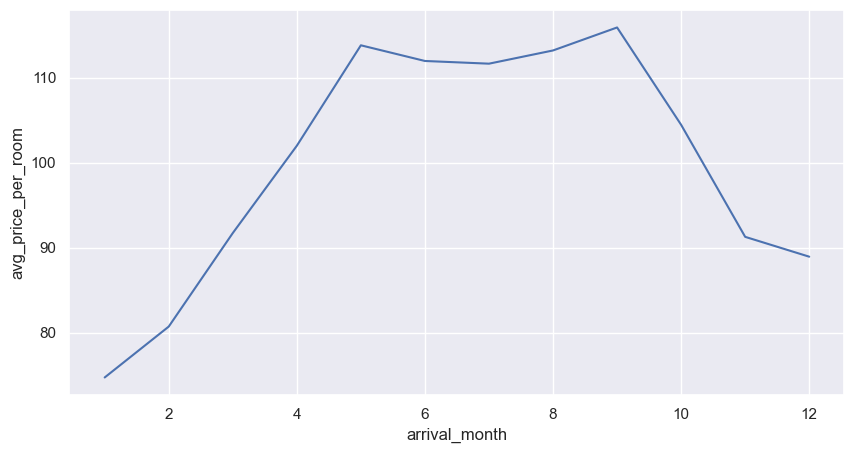

In [464]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"], ci=None)
plt.show()

* The price of rooms is highest in May to September - around 115 euros per room.

## **Data Preparation for Modeling**

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

**Separating the independent variables (X) and the dependent variable (Y)**

In [465]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True) # Encoding the Categorical features

**Splitting the data into a 70% train and 30% test set**

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [466]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)

In [467]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0    0.672377
1    0.327623
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.672333
1    0.327667
Name: booking_status, dtype: float64


## **Model Evaluation Criterion**

#### **Model can make wrong predictions as:**

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

#### **Which case is more important?** 

Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage brand equity. 



#### **How to reduce the losses?**

* The hotel would want the `F1 Score` to be maximized, the greater the F1  score, the higher the chances of minimizing False Negatives and False Positives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [468]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine (SVM)**
- **Decision Tree**
- **Random Forest**

### **Question 4: Logistic Regression (6 Marks)**

#### **Question 4.1: Build a Logistic Regression model (Use the sklearn library) (1 Mark)**

In [469]:


# Try different max_iter values
for max_iter in [100, 500, 1000, 2000]:
    print(f"Trying max_iter={max_iter}")
    lg = LogisticRegression(max_iter=max_iter)
    lg.fit(X_train, y_train)
    
    Y_pred = lg.predict(X_test)
    accuracy = accuracy_score(y_test, Y_pred)
    print(f"Accuracy: {accuracy:.2f}\n")

Trying max_iter=100
Accuracy: 0.79

Trying max_iter=500
Accuracy: 0.79

Trying max_iter=1000
Accuracy: 0.80

Trying max_iter=2000
Accuracy: 0.80



In [470]:
# Fitting logistic regression model
lg = LogisticRegression(max_iter=1000)
lg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

#### **Question 4.2: Check the performance of the model on train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     17073
           1       0.74      0.62      0.68      8319

    accuracy                           0.80     25392
   macro avg       0.78      0.76      0.77     25392
weighted avg       0.80      0.80      0.80     25392



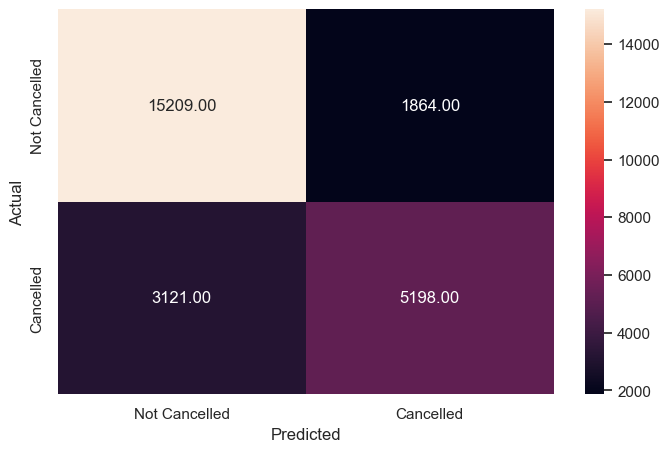

In [471]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

- Overall accuracy: 80% on the training data
- Class 0 (Not Canceled) performance:
    - Precision: 0.83
    - Recall: 0.89
    - F1-score: 0.86
- Class 1 (Canceled) performance:
    - Precision: 0.74
    - Recall: 0.62
    - F1-score: 0.68
- The Model performs better for predicting Class 0 (Not Canceled) than Class 1 (Canceled)


Let's check the performance on the test set

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      7317
           1       0.73      0.62      0.67      3566

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.79      0.80      0.79     10883



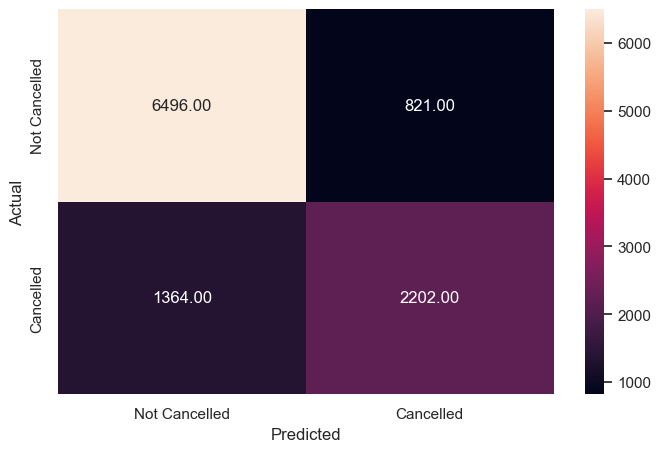

In [472]:

# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

- The performance on the testing data is almost identical to the the performance on the training data which means the Model generalises well.
- A recall of 0.62 for Class 1 means that the model correctly identified 62% of the actual canceled bookings.
- A precision of 0.73 for Class 1 means that 74% of the bookings predicted as canceled were actually canceled.
- An F1-score of 0.68 for Class 1 indicates a moderate performance, with some room for improvement.
- Overall accurcy of 80% can be considered moderate or good depending on its compoarisons to other models and the desired application of the model in the real world.


#### **Question 4.3: Find the optimal threshold for the model using the Precision-Recall Curve. (1 Mark)**

Precision-Recall curves summarize the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.

Let's use the Precision-Recall curve and see if we can find a **better threshold.**


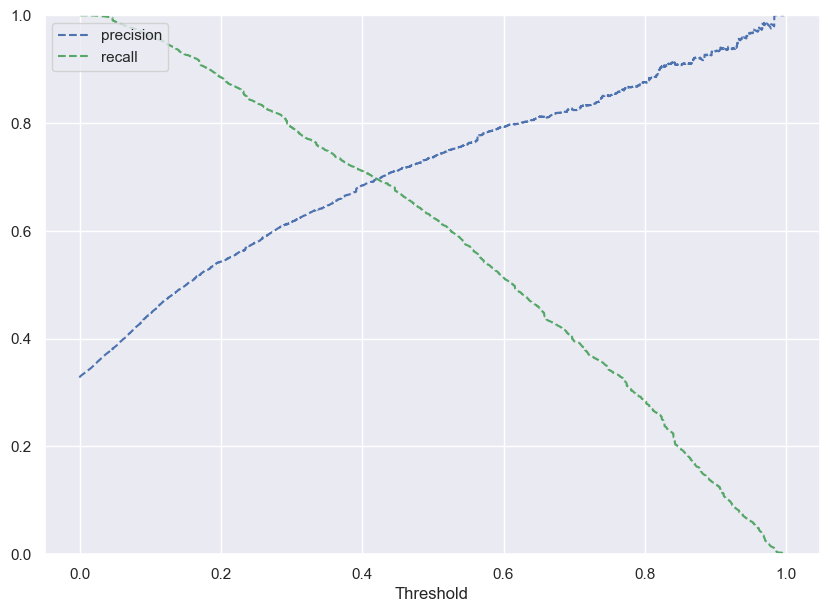

In [473]:

# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [474]:

# Calculate F1 scores for each threshold
f1_scores = [f1_score(y_train, y_scores_lg[:, 1] >= t) for t in thresholds_lg]

# Find the index of the highest F1 score
best_index = np.argmax(f1_scores)

# Find the threshold and corresponding F1 score
best_threshold = thresholds_lg[best_index]
best_f1 = f1_scores[best_index]

print(f"Best threshold: {best_threshold}, Best F1 score: {best_f1}")

Best threshold: 0.3996873532583423, Best F1 score: 0.6977840641206977


- When choosing the best threshold, it is crucial to weigh the trade-offs between precision and recall based on the hotel chain's specific objectives in detecting hotel cancellations.
- Some hotels might allow a certain degree of overbooking, expecting high cancellation rates to ultimately drive up profits.
- However, for hotels that regularly reach full capacity, failing to provide a room for a customer with a reservation can lead to a loss of brand reputation and potential legal issues, especially if customers face health risks due to temporary homelessness.
- As a result, the hotel chain should prioritize minimizing false cancellations over false non-cancellations. While the best threshold is not always the one with the highest F1 score, for this exercise, we will assume a significantly higher cost associated with falsely identified non-cancellations and aim to find the model with the best F1 score.
- The threshold with the highest F1 score is 0.4 as per the above calculations.

In [475]:
# Setting the optimal threshold
optimal_threshold = 0.4

#### **Question 4.4: Check the performance of the model on train and test data using the optimal threshold. (2 Marks)**

              precision    recall  f1-score   support

           0       0.86      0.84      0.85     17073
           1       0.68      0.71      0.70      8319

    accuracy                           0.80     25392
   macro avg       0.77      0.78      0.77     25392
weighted avg       0.80      0.80      0.80     25392



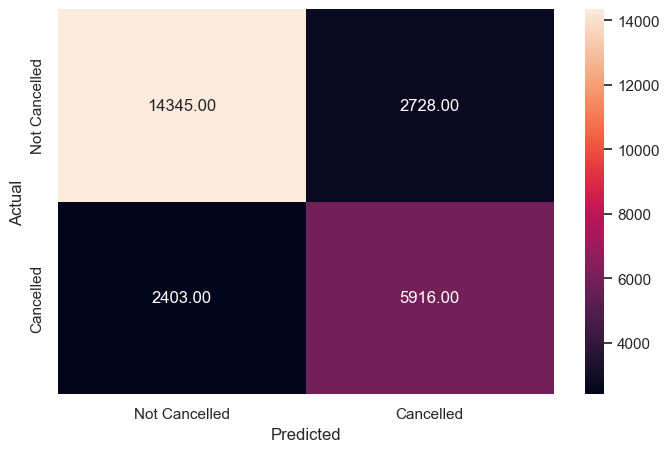

In [476]:

# Creating confusion matrix
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

- Custom threshold (0.42): Higher precision (0.68) but lower recall (0.71) for cancellations, better F1-score (0.70), and the same overall accuracy (0.80).
- Default threshold (0.5): Lower precision (0.74), higher recall (0.62) for cancellations, slightly lower F1-score (0.67), and the same overall accuracy (0.80).
- Custom threshold performs better in precision and F1-score for cancellations, while default threshold has better recall.
- Choosing the threshold should be based on the hotel's priorities and the costs associated with false negatives and false positives. The best threshold may not necessarily be the one with the highest F1 score, but rather the one that aligns better with the business objectives.

Let's check the performance on the test set

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      7317
           1       0.68      0.70      0.69      3566

    accuracy                           0.79     10883
   macro avg       0.76      0.77      0.77     10883
weighted avg       0.79      0.79      0.79     10883



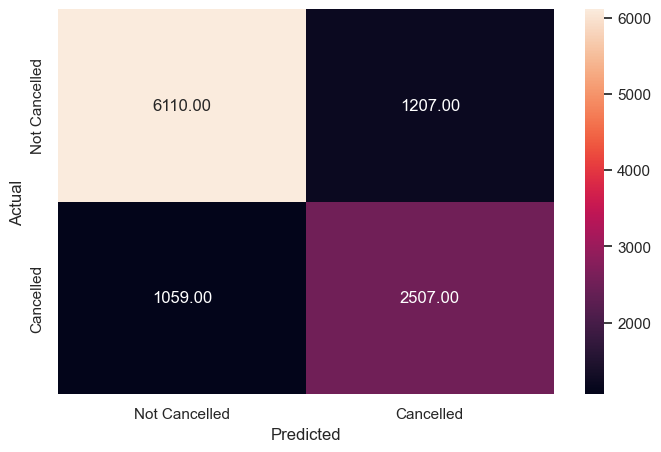

In [477]:

y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

- The precision for cancellations (class 1) is lower in the test data (0.61) compared to the training data (0.68).
- The recall for cancellations (class 1) is higher in the test data (0.81) compared to the training data (0.71).
- The F1-score for cancellations (class 1) is slightly lower in the test data (0.69) compared to the training data (0.70).
- The overall accuracy is lower for the test data (0.77) compared to the training data (0.80).
- Overall, the custom threshold (0.42) provides better performance in terms of recall and F1-score for cancellations on the test data, while the default threshold (0.5) has slightly better overall accuracy. The choice of threshold should be based on the hotel's priorities and costs associated with false negatives and false positives.


### **Question 5: Support Vector Machines (11 Marks)**

To accelerate SVM training, let's scale the data for support vector machines.

In [478]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

Let's build the models using the two of the widely used kernel functions:

1.   **Linear Kernel**
2.   **RBF Kernel**



#### **Question 5.1: Build a Support Vector Machine model using a linear kernel (1 Mark)**

**Note: Please use the scaled data for modeling Support Vector Machine**

In [479]:

svm = SVC(kernel='linear',probability=True) # Linear kernal or linear decision boundary
model = svm.fit(X_train_scaled, y_train)

#### **Question 5.2: Check the performance of the model on train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     17073
           1       0.74      0.61      0.67      8319

    accuracy                           0.80     25392
   macro avg       0.79      0.76      0.77     25392
weighted avg       0.80      0.80      0.80     25392



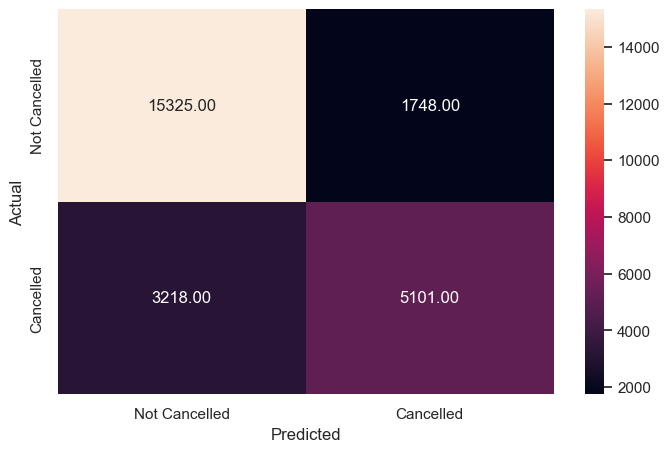

In [480]:

y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

- Precision: For class 1 (cancellations), the precision is 0.74, which means that 74% of the predicted cancellations were actual cancellations. For class 0 (not canceled), the precision is 0.83.
- Recall: The recall for class 1 (cancellations) is 0.61, indicating that the model identified 61% of the actual cancellations. For class 0 (not canceled), the recall is 0.90.
- F1-score: The F1-score for class 1 (cancellations) is 0.67, and for class 0 (not canceled) is 0.86. The F1-score is the harmonic mean of precision and recall, representing a balance between the two.
- Accuracy: The overall accuracy of the model is 0.80, meaning that it correctly predicted the booking status (canceled or not canceled) for 80% of the observations in the training data.
- The performance of the SVM model with a linear kernel is quite similar to the logistic regression model. The macro average and weighted average of the F1-scores are both 0.77 and 0.80, respectively, which indicates that the model's performance is consistent across both classes.


Checking model performance on test set

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7317
           1       0.74      0.61      0.67      3566

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.80      0.80      0.80     10883



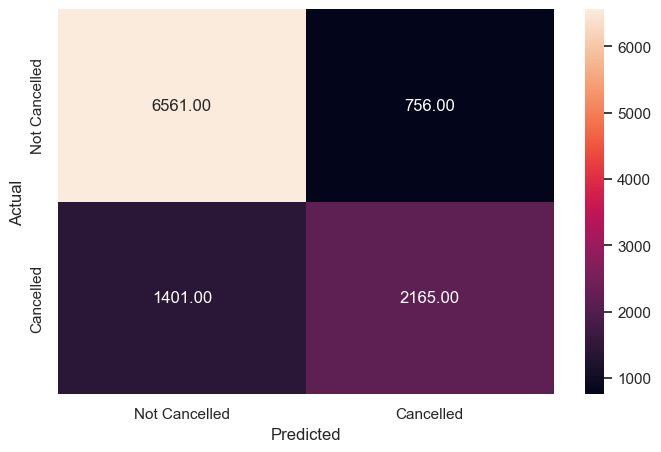

In [481]:

y_pred_test_svm = model.predict(X_test_scaled)
metrics_score(y_test, y_pred_test_svm)

- For class 1 (cancellations), the precision is 0.74, which means that 74% of the predicted cancellations were actual cancellations. For class 0 (not canceled), the precision is 0.82.
- The recall for class 1 (cancellations) is 0.61, indicating that the model identified 61% of the actual cancellations. For class 0 (not canceled), the recall is 0.90.
- The F1-score for class 1 (cancellations) is 0.67, and for class 0 (not canceled) is 0.86. The F1-score is the harmonic mean of precision and recall, representing a balance between the two.
- The overall accuracy of the model is 0.80, meaning that it correctly predicted the booking status (canceled or not canceled) for 80% of the observations in the test data.
- The performance of the SVM model with a linear kernel on the test data is quite similar to its performance on the training data. The macro average and weighted average of the F1-scores are both 0.76 and 0.80, respectively, which indicates that the model's performance is consistent across both classes and has generalized well to the test data.


#### **Question 5.3: Find the optimal threshold for the model using the Precision-Recall Curve. (1 Mark)**


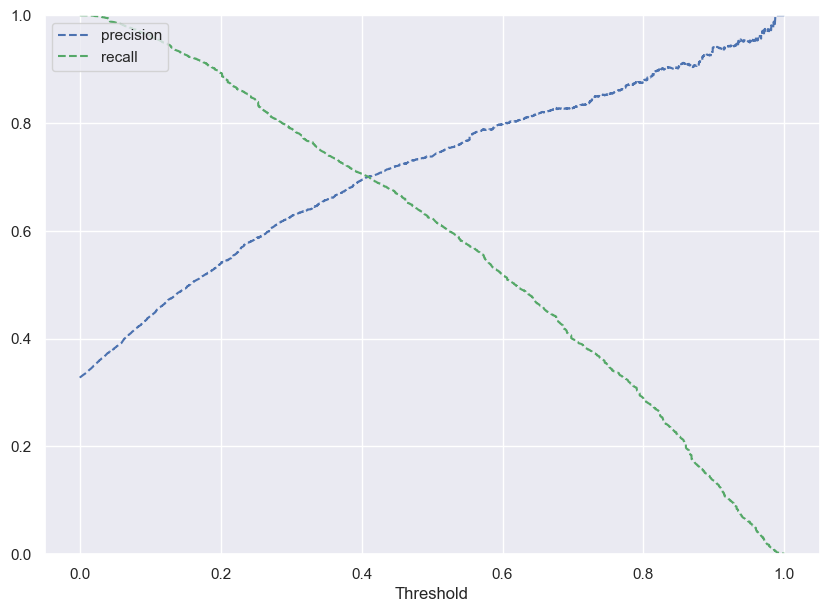

In [482]:

# Predict on train data
y_scores_svm=model.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()


In [483]:

# Calculate F1 scores for each threshold
f1_scores = [f1_score(y_train, y_scores_svm[:, 1] >= t) for t in thresholds_lg]

# Find the index of the highest F1 score
best_index = np.argmax(f1_scores)

# Find the threshold and corresponding F1 score
best_threshold = thresholds_lg[best_index]
best_f1 = f1_scores[best_index]

print(f"Best threshold: {best_threshold}, Best F1 score: {best_f1}")

Best threshold: 0.4029472477158818, Best F1 score: 0.7007412721186036


- When choosing the best threshold, it is crucial to weigh the trade-offs between precision and recall based on the hotel chain's specific objectives in detecting hotel cancellations.
- Some hotels might allow a certain degree of overbooking, expecting high cancellation rates to ultimately drive up profits.
- However, for hotels that regularly reach full capacity, failing to provide a room for a customer with a reservation can lead to a loss of brand reputation and potential legal issues, especially if customers face health risks due to temporary homelessness.
- As a result, the hotel chain should prioritize minimizing false cancellations over false non-cancellations. While the best threshold is not always the one with the highest F1 score, for this exercise, we will assume a significantly higher cost associated with falsely identified non-cancellations and aim to find the model with the best F1 score.
- The threshold with the highest F1 score is 0.4 as per the above calculations.


In [484]:
optimal_threshold_svm=0.402

#### **Question 5.4: Check the performance of the model on train and test data using the optimal threshold. (2 Marks)**

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     17073
           1       0.70      0.70      0.70      8319

    accuracy                           0.80     25392
   macro avg       0.78      0.78      0.78     25392
weighted avg       0.80      0.80      0.80     25392



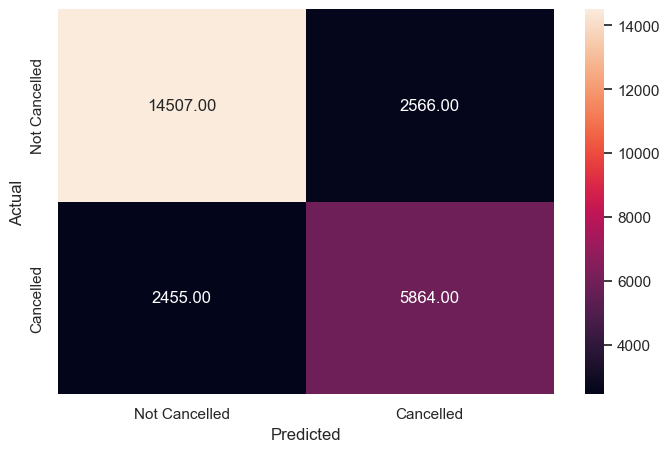

In [485]:

y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

- Custom threshold (0.42): Higher precision (0.70) and the same recall (0.70) for cancellations, better F1-score (0.70), and the same overall accuracy (0.80).
- Default threshold (0.5): Lower precision (0.74), higher recall (0.61) for cancellations, slightly lower F1-score (0.67), and the same overall accuracy (0.80).
- Custom threshold performs better in precision and F1-score for cancellations, while the default threshold has better recall.
- Choosing the threshold should be based on the hotel's priorities and the costs associated with false negatives and false positives. The best threshold may not necessarily be the one with the highest F1 score, but rather the one that aligns better with the business objectives.


              precision    recall  f1-score   support

           0       0.85      0.84      0.85      7317
           1       0.69      0.70      0.70      3566

    accuracy                           0.80     10883
   macro avg       0.77      0.77      0.77     10883
weighted avg       0.80      0.80      0.80     10883



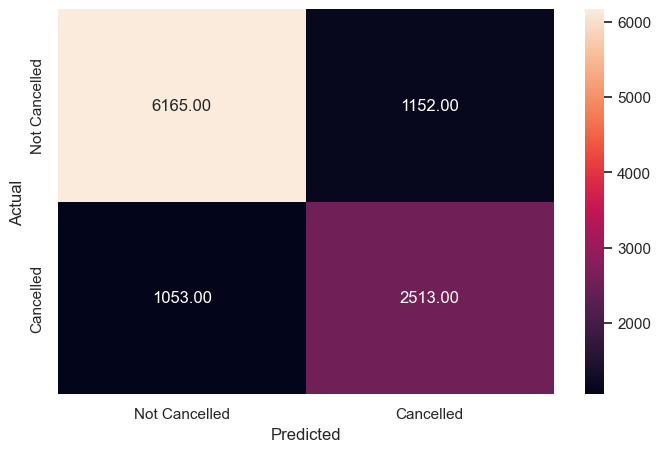

In [486]:

y_pred_test = model.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

- The precision for cancellations (class 1) is lower in the test data (0.69) compared to the training data (0.70).
- The recall for cancellations (class 1) is the same in the test data (0.70) compared to the training data (0.70).
- The F1-score for cancellations (class 1) is the same in the test data (0.70) compared to the training data (0.70).
- The overall accuracy is the same for the test data (0.80) compared to the training data (0.80).
- Overall, the custom threshold (0.42) provides consistent performance in terms of precision, recall, and F1-score for cancellations between the test data and the training data. The choice of threshold should be based on the hotel's priorities and costs associated with false negatives and false positives.

#### **Question 5.5: Build a Support Vector Machines model using an RBF kernel (1 Mark)**

In [487]:

svm_rbf=SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train_scaled,y_train)

SVC(probability=True)

#### **Question 5.6: Check the performance of the model on train and test data (2 Marks)**



              precision    recall  f1-score   support

           0       0.84      0.91      0.88     17073
           1       0.79      0.65      0.71      8319

    accuracy                           0.83     25392
   macro avg       0.81      0.78      0.80     25392
weighted avg       0.82      0.83      0.82     25392



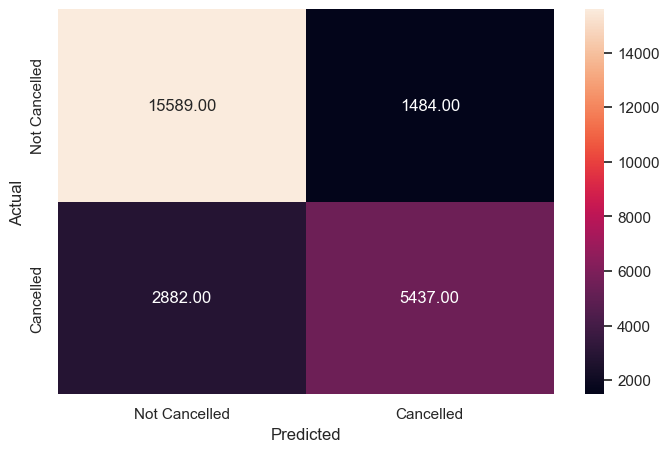

In [488]:

y_pred_train_svm = svm_rbf.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

- When compared to the baseline svm model with linear kernel, the model's performance on training data has been slightly improved by using an RBF kernel.


#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      7317
           1       0.78      0.63      0.70      3566

    accuracy                           0.82     10883
   macro avg       0.81      0.77      0.78     10883
weighted avg       0.82      0.82      0.81     10883



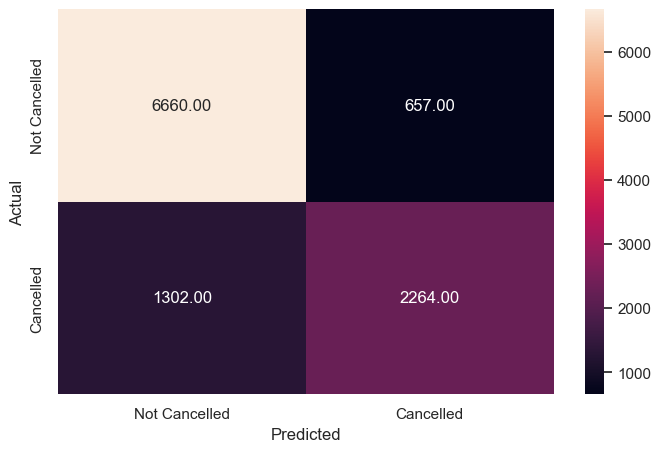

In [489]:

y_pred_test = svm_rbf.predict(X_test_scaled)

metrics_score(y_test, y_pred_test)

The SVM model with an RBF kernel performs slightly better than the linear kernel SVM model, with higher overall accuracy (0.82 vs. 0.80), macro average F1-score (0.78 vs. 0.76), and weighted average F1-score (0.81 vs. 0.80). The RBF kernel SVM also has better precision and F1-score for class 1 (cancellations). However, it has a lower recall for class 1 compared to the linear kernel SVM. Depending on the problem and the trade-offs between precision and recall, you may choose the model that best aligns with your objectives.


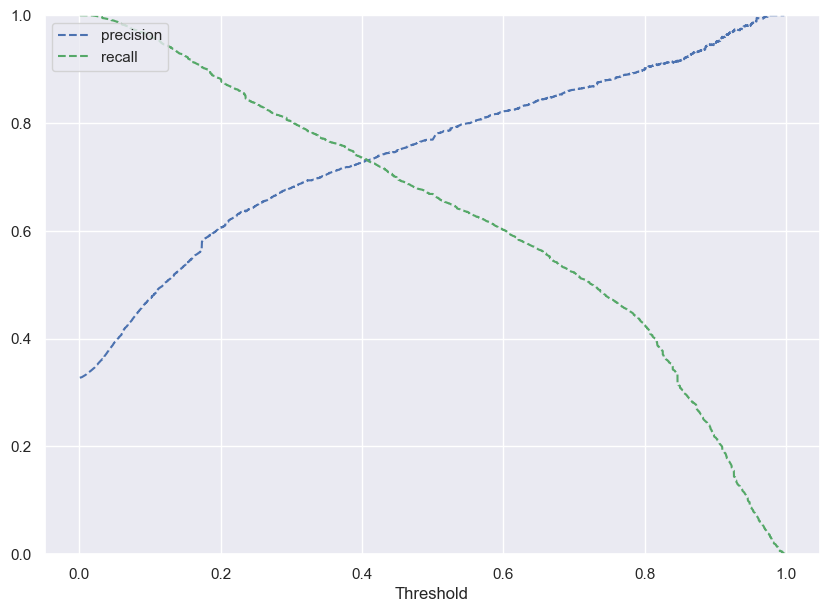

In [490]:
# Predict on train data
y_scores_svm=svm_rbf.predict_proba(X_train_scaled)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [491]:
# Calculate F1 scores for each threshold
f1_scores = [f1_score(y_train, y_scores_svm[:, 1] >= t) for t in thresholds_lg]

# Find the index of the highest F1 score
best_index = np.argmax(f1_scores)

# Find the threshold and corresponding F1 score
best_threshold = thresholds_lg[best_index]
best_f1 = f1_scores[best_index]

print(f"Best threshold: {best_threshold}, Best F1 score: {best_f1}")

Best threshold: 0.2926088214001782, Best F1 score: 0.7374295562729112


In [492]:
optimal_threshold_svm=0.29

#### **Question 5.7: Check the performance of the model on train and test data using the optimal threshold. (2 Marks)**

              precision    recall  f1-score   support

           0       0.89      0.76      0.82     17073
           1       0.62      0.80      0.70      8319

    accuracy                           0.77     25392
   macro avg       0.75      0.78      0.76     25392
weighted avg       0.80      0.77      0.78     25392



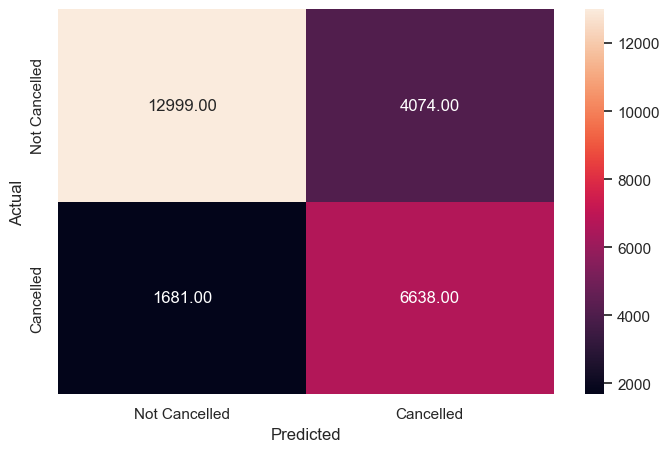

In [493]:

y_pred_train_svm = model.predict_proba(X_train_scaled)
metrics_score(y_train, y_pred_train_svm[:,1]>optimal_threshold_svm)

Using the optimal threshold for the RBF kernel SVM model results in a higher recall for class 1 (cancellations), but lower precision. The overall accuracy and weighted average F1-score are slightly lower than the default threshold RBF kernel SVM. The macro average F1-score remains the same. In this case, choosing between the default threshold and the optimal threshold depends on the specific priorities and costs associated with false negatives and false positives for the hotel.


              precision    recall  f1-score   support

           0       0.89      0.80      0.84      7317
           1       0.66      0.80      0.73      3566

    accuracy                           0.80     10883
   macro avg       0.78      0.80      0.79     10883
weighted avg       0.82      0.80      0.81     10883



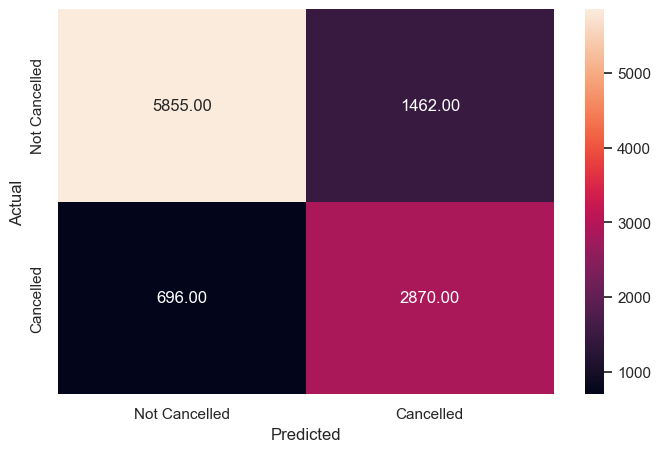

In [494]:

y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold_svm)

The performance of the RBF kernel SVM model with the optimal threshold on the test data is quite similar to its performance on the training data. The overall accuracy, macro average F1-score, and weighted average F1-score are slightly better on the test data, indicating that the model has generalized well to the test data. The recall for class 1 (cancellations) remains the same, while the precision for class 1 (cancellations) has increased slightly in the test data.


### **Question 6: Decision Trees (7 Marks)**

#### **Question 6.1: Build a Decision Tree Model (1 Mark)**

In [496]:

model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

#### **Question 6.2: Check the performance of the model on train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17073
           1       1.00      0.99      0.99      8319

    accuracy                           0.99     25392
   macro avg       1.00      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



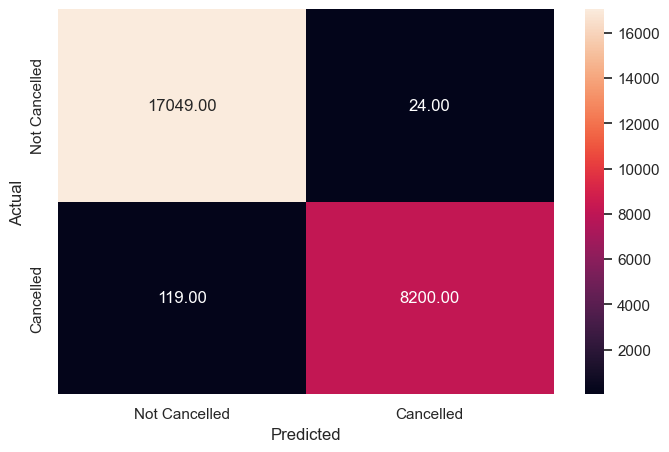

In [498]:

# Checking performance on the training dataset
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

- The model achieves very low errors on the training set, classifying most samples correctly.
- It demonstrates excellent performance on the training data.
- A decision tree, if left unrestricted, will continue to grow and correctly classify each data point, as it learns all the patterns in the training set.
- To determine if the model is overfitting, it is essential to evaluate its performance on the test data.


#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7317
           1       0.79      0.79      0.79      3566

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883



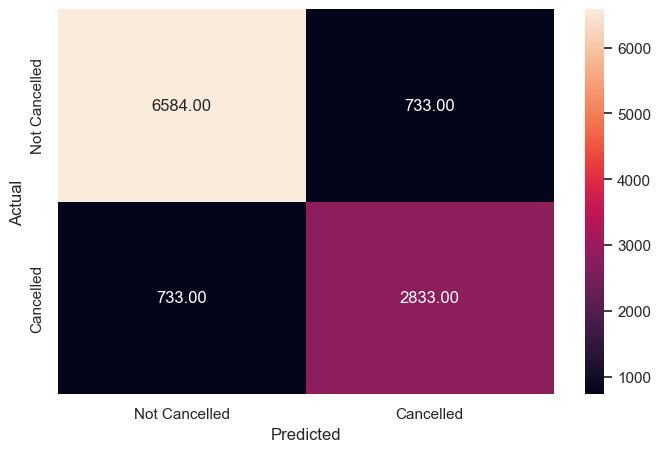

In [499]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

- The decision tree model demonstrates strong performance on the test data, with relatively high precision, recall, and F1-scores for both classes. The overall accuracy of 0.87 indicates good generalization to unseen data.
- Although the Decision Tree model shows better performance on the test data compared to the RBF kernel model, it's essential to consider the risk of overfitting. It may be worth adjusting the Decision Tree model's hyperparameters to achieve better generalization.


 #### **Question 6.3: Perform hyperparameter tuning for the decision tree model using GridSearch CV (1 Mark)**

**Note: Please use the following hyperparameters provided for tuning the Decision Tree. In general, you can experiment with various hyperparameters to tune the decision tree, but for this project, we recommend sticking to the parameters provided.**

In [500]:

# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='f1',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

#### **Question 6.4: Check the performance of the model on the train and test data using the tuned model (2 Mark)**

#### Checking performance on the training set 

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     17073
           1       0.82      0.68      0.75      8319

    accuracy                           0.85     25392
   macro avg       0.84      0.81      0.82     25392
weighted avg       0.85      0.85      0.84     25392



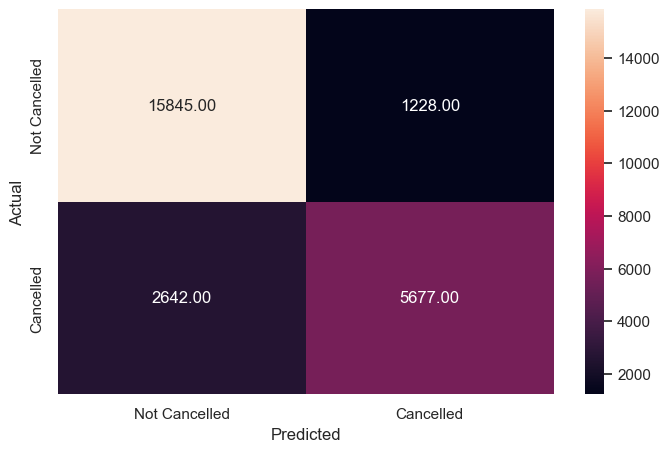

In [501]:

# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train, dt_tuned)

The default decision tree model has a much higher performance on the training data compared to the tuned decision tree model. However, such high performance on the training data might indicate overfitting, which means the model is not generalizing well on unseen data (test data). It is essential to check the performance of both models on the test data to have a better understanding of which model is more suitable.


              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7317
           1       0.82      0.67      0.74      3566

    accuracy                           0.84     10883
   macro avg       0.84      0.80      0.81     10883
weighted avg       0.84      0.84      0.84     10883



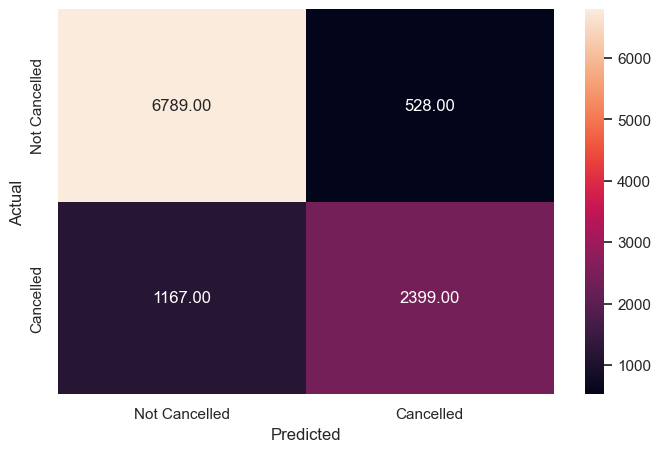

In [503]:

# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test, y_pred_tuned)

The performance of the tuned decision tree model on the test data is quite similar to its performance on the training data. The small differences in precision, recall, F1-score, and accuracy between the training and test data indicate that the tuned model is generalizing well on unseen data, making it a better choice than the default decision tree model, which appears to be overfitting on the training data.

#### **Visualizing the Decision Tree**

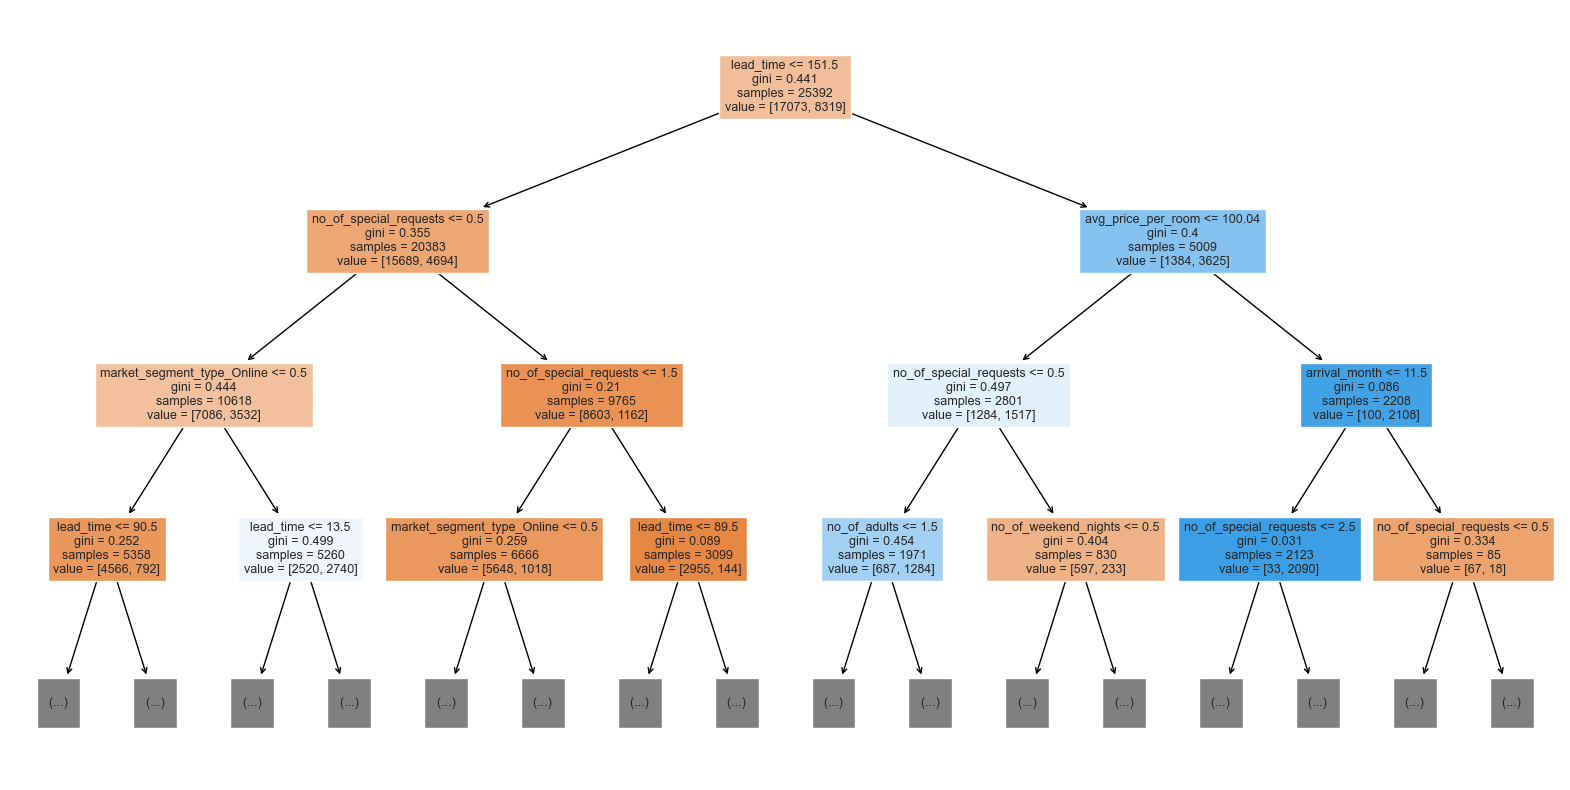

In [504]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,max_depth=3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

#### **Question 6.5: What are some important features based on the tuned decision tree? (1 Mark)**

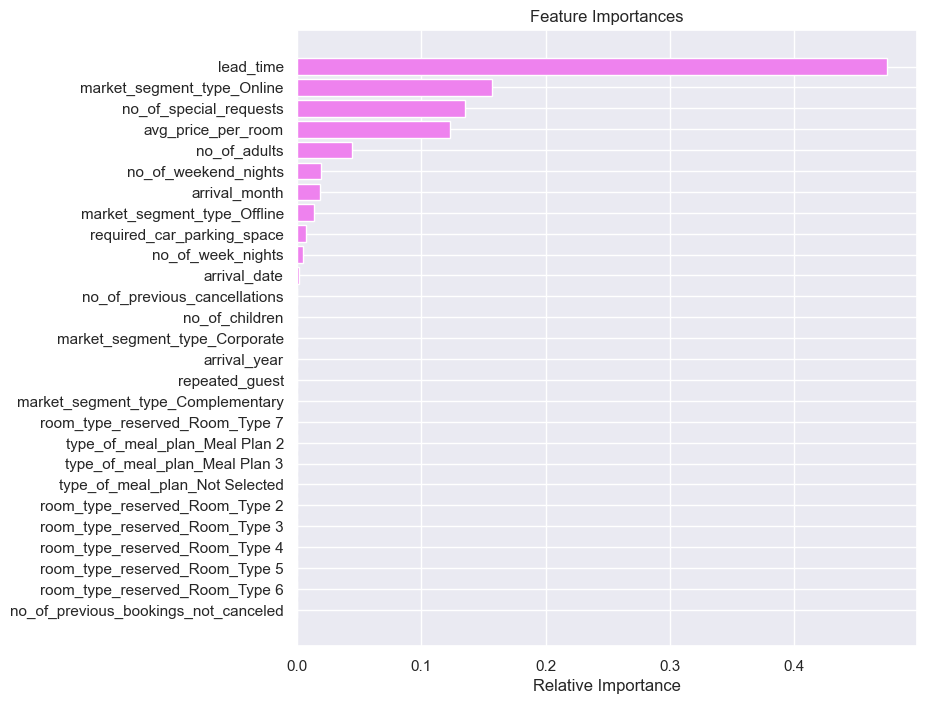

In [518]:

# Importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- We can observe from the analysis that the most significant feature affecting the model is lead time.
- Market segment type, number of special requirements, and average price per room also play important roles in the prediction.
- The number of adults is significant as well, followed by five other features with marginal significance.
- The remaining features do not have a significant impact on the model's performance.


___

### **Question 7: Random Forest (4 Marks)**

#### **Question 7.1: Build a Random Forest Model (1 Mark)**

In [508]:

rf_estimator = RandomForestClassifier(random_state=1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### **Question 7.2: Check the performance of the model on the train and test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17073
           1       1.00      0.99      0.99      8319

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



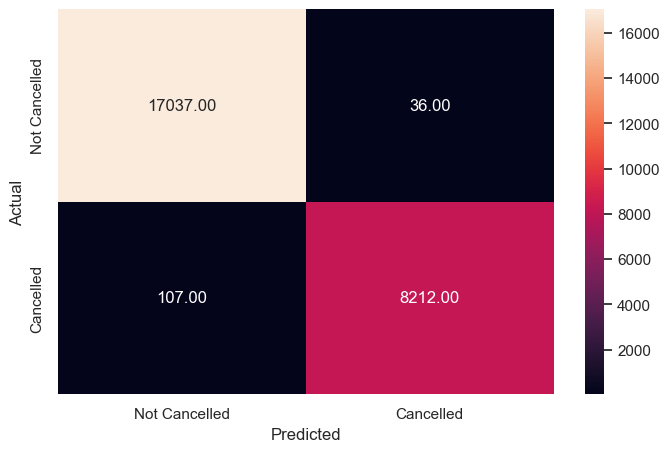

In [509]:

y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

- These results indicate that the random forest classifier has learned the patterns in the training data very well.
- However, it is important to evaluate the model on test data to ensure it generalizes well and is not overfitting the training data.


              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7317
           1       0.88      0.80      0.84      3566

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.88     10883
weighted avg       0.90      0.90      0.90     10883



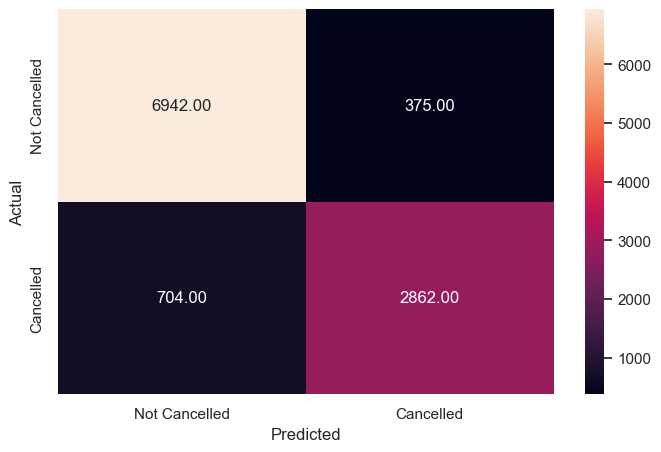

In [510]:

y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)


The model's performance on the test data is slightly lower compared to the training data, but it still generalizes well to unseen data. The random forest classifier shows strong performance, with high precision, recall, and F1-scores for both classes, making it a suitable model for predicting hotel booking cancellations.


#### **Question 7.3: What are some important features based on the Random Forest? (1 Mark)**

Let's check the feature importance of the Random Forest

                                      Importance
lead_time                               0.316765
avg_price_per_room                      0.156404
no_of_special_requests                  0.104542
arrival_date                            0.091649
arrival_month                           0.081282
no_of_week_nights                       0.051612
no_of_weekend_nights                    0.037293
market_segment_type_Online              0.030085
no_of_adults                            0.026166
arrival_year                            0.025695
market_segment_type_Offline             0.018212
type_of_meal_plan_Meal Plan 2           0.011274
room_type_reserved_Room_Type 4          0.009446
type_of_meal_plan_Not Selected          0.009413
no_of_children                          0.006922
required_car_parking_space              0.006421
market_segment_type_Corporate           0.005411
room_type_reserved_Room_Type 2          0.002536
room_type_reserved_Room_Type 6          0.002115
repeated_guest      

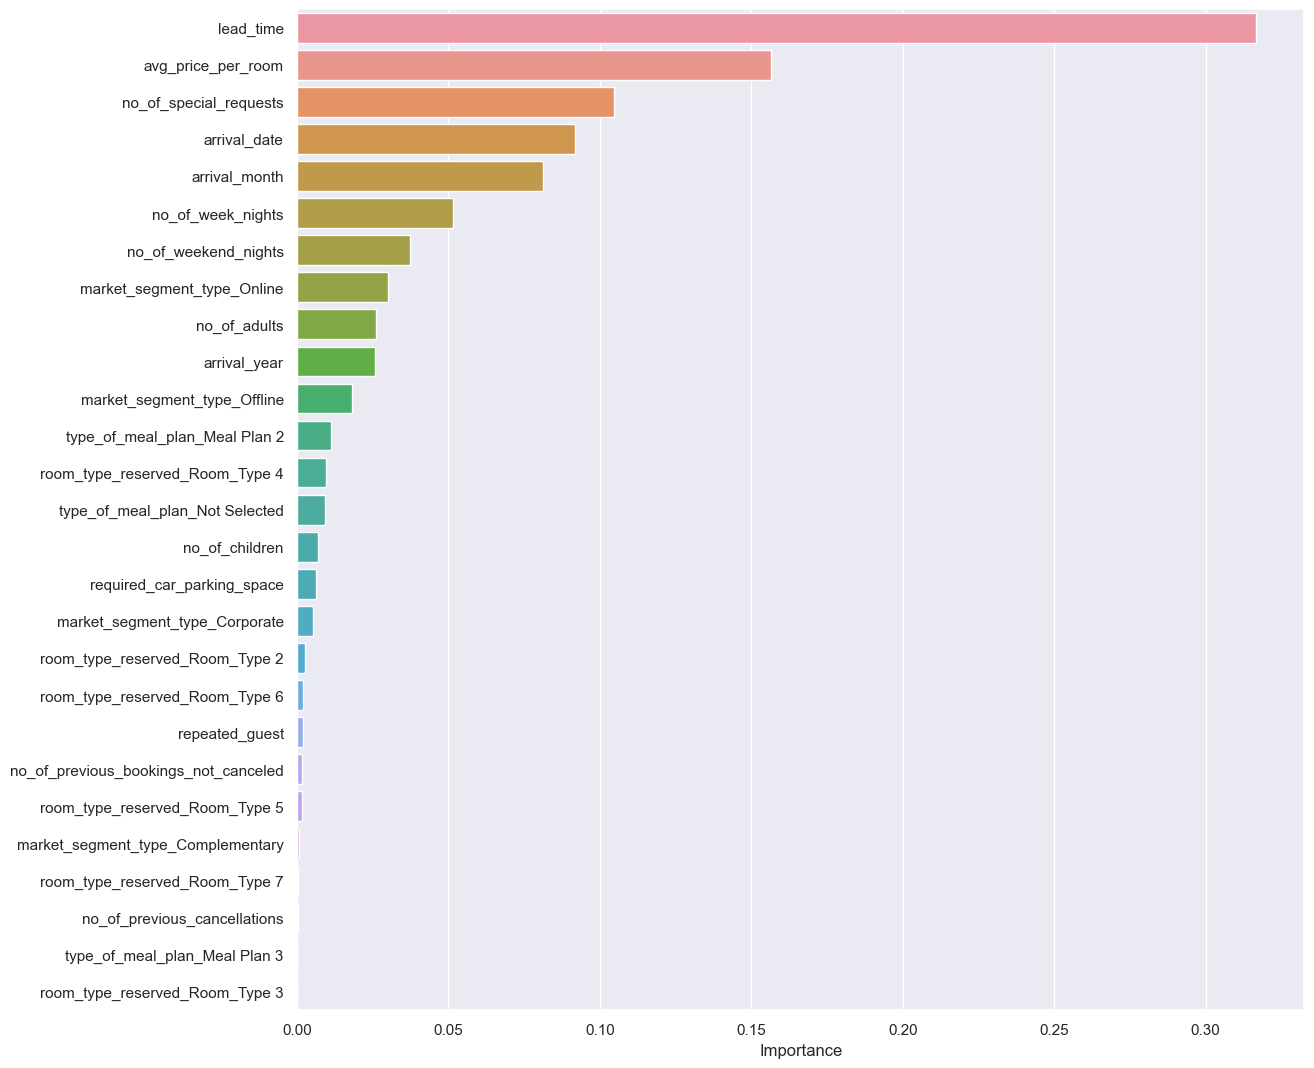

In [515]:

importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x = importance_df['Importance'], y = importance_df.index)

print(importance_df)

- The Random Forest model has the best performance among the tested models. The most significant feature in predicting hotel booking cancellations is lead time, followed by average price per room, number of special requests, arrival date, and arrival month.


### **Question 8: Conclude ANY FOUR key takeaways for business recommendations (4 Marks)**

The most significant feature in predicting hotel booking cancellations is the lead time, which is the time between the booking date and the intended arrival date. This is followed by the average price per room, market segment type (online, offline, corporate, etc.), the number of special requests made by the customer, and the arrival date.

Although these models can provide valuable insights into predicting hotel booking cancellations, it is important to consider other factors that may influence the decision-making process. One critical aspect to keep in mind is the need to balance the trade-offs between precision and recall, depending on the hotel chain's specific objectives in detecting hotel cancellations.

For instance, some hotels may intentionally allow a certain degree of overbooking, anticipating high cancellation rates to ultimately increase profits. In contrast, hotels that frequently reach full capacity must be cautious about overbooking, as failing to provide a room for a customer with a reservation can lead to a loss of brand reputation and potential legal issues. This is particularly relevant if customers face health risks due to temporary homelessness as a result of unavailability of rooms.

As a result, hotel chains should prioritize minimizing false cancellations (predicting a booking will be canceled when it won't be) over false non-cancellations (predicting a booking will not be canceled when it will be). While the best threshold for classification is not always the one with the highest F1 score, we will make this assumption for model comparison purposes.

Under this assumption, the Random Forest model demonstrates the best performance on the test data, achieving an accuracy of 0.90 and an F1-score of 0.84 for cancellations (Class 1). Other models, such as Decision Tree, RBF Kernel SVM, Linear Kernel SVM, and Logistic Regression, also show varying degrees of accuracy and F1-scores. Hotel chains should carefully consider their specific needs and objectives when selecting and implementing a model for predicting booking cancellations.



## **Happy Learning!**